# Useful snippets

Free OSM geocoder - place to coordinates (and zip code too!):

In [ ]:
import geocoder

g = geocoder.osm('University of Oxford, United Kingdom')
g.osm

{'x': -1.255807200927876,
 'y': 51.75805175000001,
 'addr:street': 'South Parks Road',
 'addr:city': 'Oxford',
 'addr:state': 'England',
 'addr:country': 'United Kingdom',
 'addr:postal': 'OX1 3TG'}

Function for converting coordinates in format x°y'z" E/W/N/S to decimal number to plot with matplotlib or plotly:

In [ ]:
def convert(old):
    direction = {'N':1, 'S':-1, 'E': 1, 'W':-1}
    if '°' not in old:
        old = '0°' + old
    new = old.replace('°',' ').replace('′',' ').replace('″',' ').replace('.',' ').replace('\'',' ').replace('"',' ')
    new = new.split()
    new_dir = new.pop()
    new.extend([0,0,0])
    return (int(new[0])+int(new[1])/60.0+int(new[2])/3600.0) * direction[new_dir[0]]

# Day 1. Points

Dataset: [Shipwrecks (Sunk ships)](https://www.kaggle.com/datasets/diaaessam/shipwrecks-sunk-ships)

Need this for exporting to images:

In [ ]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Shipwrecks or Sunk ships.csv')
df.head()

,Ship,Flag,Sunk date,Notes,Coordinates
0,Black Assarca shipwreck,Unknown,Early 7th century (Presumed),A wreck discovered at Black Assarca Island in ...,NaN
1,Globe Star,Singapore,27-Apr-73,A cargo ship that ran aground off Mombasa.[1],4°04′54″S 39°43′12″E
2,Gulland,Aden,13-Apr-51,A 545-ton Isles-class trawler built for World ...,04°02′50″S 39°43′57″E
3,Mtongwe,Tanzania,27-Apr-94,A Likoni and Mombasa route ferry that capsized...,NaN
4,Katina P,Greece,26-Apr-92,"An oil tanker that was damaged in a storm, spi...",25°35′S 32°59′E


Preprocessing:

In [ ]:
df = df.dropna()
df['Coordinates'] = df['Coordinates'].apply(lambda x: x.split('/')[0] if '/' in x else x)
df[['Latitude', 'Longitude']] = df['Coordinates'].str.split(' ', n=1, expand=True)

df = df[df['Latitude'].str.contains('S|N')]
df = df[df['Longitude'].str.contains('E|W')]

df['Latitude']  = df['Latitude'].apply(convert)
df['Longitude']  = df['Longitude'].apply(convert)
df.head()

,Ship,Flag,Sunk date,Notes,Coordinates,Latitude,Longitude
1,Globe Star,Singapore,27-Apr-73,A cargo ship that ran aground off Mombasa.[1],4°04′54″S 39°43′12″E,-4.081667,39.720000
2,Gulland,Aden,13-Apr-51,A 545-ton Isles-class trawler built for World ...,04°02′50″S 39°43′57″E,-4.047222,39.732500
4,Katina P,Greece,26-Apr-92,"An oil tanker that was damaged in a storm, spi...",25°35′S 32°59′E,-25.583333,32.983333
5,Sunny South,Royal Navy,20 February 1861,An American-built extreme clipper sold to Hava...,13°02′53″S 45°11′42″E,-13.048056,45.195000
6,Achille Lauro,Italy,2-Dec-94,A cruise ship that was hijacked in 1985 by the...,2°N 47°E,2.000000,47.000000


<ipython-input-7-99d91541cb12>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


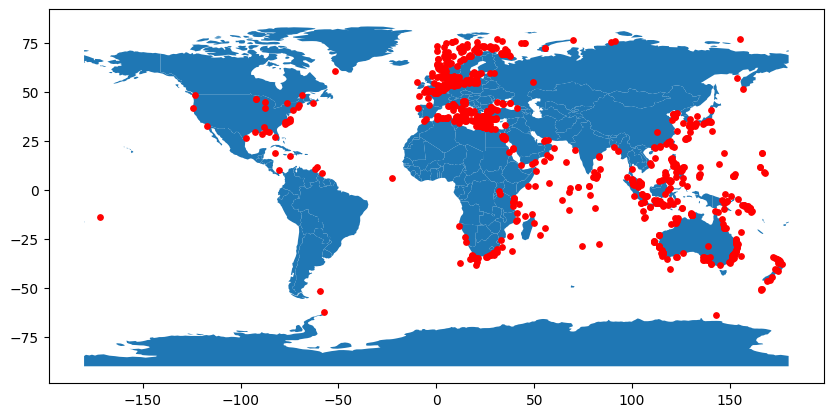

In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

Sadly, function write_image works only with carto-darkmatter mapbox style. With my custom style it throws error. According to the Google, it's a bug that wasn't fixed yet.

In [ ]:
import plotly.express as px
import pandas as pd


fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    hover_name="Ship",
    hover_data=["Notes", "Flag"],
    color_discrete_sequence=["#FED414"],
    zoom=1,
    height=600,
)
# "mapbox://styles/tabbt/clofud9f5005m01r05o5masgb"
px.set_mapbox_access_token("pk.eyJ1IjoidGFiYnQiLCJhIjoiY2xmMjk1ZW42MGc2czN4bXRleGR5azZibiJ9.BV_KLSJShcbGBJZJ7BrQIQ")
fig.update_layout(mapbox_style="carto-darkmatter")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(mapbox_bounds={"west": -20, "east": 50, "south": 29, "north": 90})
fig.update_traces(
        marker=dict(size=6)
    )
fig.write_image("day1.png", format='png', height=1400, width=1200, scale=4)
fig.write_image("day1.svg", format='svg', height=1400, width=1200, scale=4)
fig.show()

# Day 2. Lines

All variants were not very good, so I returned to using Mapbox. But still here are some useful pieces of code.

Data: https://data-canalrivertrust.opendata.arcgis.com/datasets/CanalRiverTrust::canals-by-km-length-20/about

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#read in once
df_places = gpd.read_file('Canals.geojson')

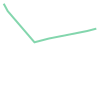

In [ ]:
df_places['geometry'][0]

<Axes: >

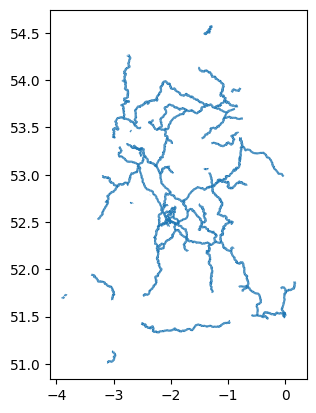

In [ ]:
df_places.plot()

In [ ]:
!pip3 install basemap

In [ ]:
!pip install  basemap-data-hires

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 2.0 MB/s eta 0:00:00


In [ ]:
df_places.head()

,objectid,functionallocation,sapcanalcode,name,sapnavstatus,region,globalid,pub_regional_name,SHAPE_Length,geometry
0,1,AB-001,AB,Albert Dock,Fully Navigable,North West,{3AD31531-77CA-4FFB-A813-65FB3A7E2B13},North West,0.003435,"MULTILINESTRING ((-2.99402 53.40132, -2.99398 ..."
1,2,AC-001,AC,Abbey Creek,Partially Navigable,London & South East,{577A099D-6FD6-4B41-BEDA-77D7C17866E8},London & South East,0.003140,"MULTILINESTRING ((-0.00069 51.52791, -0.00063 ..."
2,3,AD-001,AD,Bank Dole Cut,Fully Navigable,Yorkshire & North East,{751FD61D-38AB-4405-9266-E18A905E3EE5},Yorkshire & North East,0.006307,"MULTILINESTRING ((-1.23154 53.70948, -1.23117 ..."
3,4,AI-001,AI,River Aire,Fully Navigable,Yorkshire & North East,{EA6929A5-EE77-459A-99DD-097C3118C69C},Yorkshire & North East,0.012722,"MULTILINESTRING ((-1.22543 53.70994, -1.22503 ..."
4,5,AI-002,AI,River Aire,Fully Navigable,Yorkshire & North East,{B0912FA0-1E8C-4B55-BA4D-C9465C7EA08D},Yorkshire & North East,0.011933,"MULTILINESTRING ((-1.21659 53.71445, -1.21633 ..."


I like the colors, but struggled in plotting my geodata on a Basemap. Still it's a good variant, maybe will use it later.

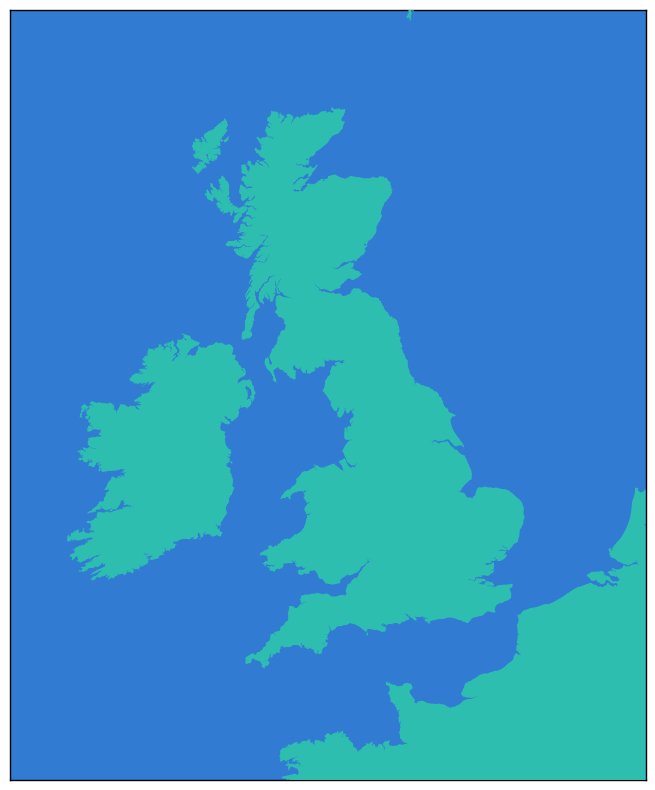

In [ ]:
from mpl_toolkits.basemap import Basemap

fig, ax = plt.subplots(figsize=(10,10))  # plt.figure(figsize=(10,10))
####
map = Basemap(projection='merc', lat_0=49, lon_0=-123,
              resolution = 'h', area_thresh = 1000,
              llcrnrlon=-12, llcrnrlat=48,
              urcrnrlon=5, urcrnrlat=60,)
####

map.drawmapboundary(fill_color='#327BD3', zorder=1)
# map.drawcoastlines()
# map.drawcountries()
map.fillcontinents(color='#2EBEB0', zorder=2)

# df_places.plot(color='#FABFB7', figsize=(10,10))
df_places.to_crs(3857).plot(ax=ax, color='red', zorder=10)

plt.show()

In [ ]:
!pip install contextily

Looks like map from good old roadbook:

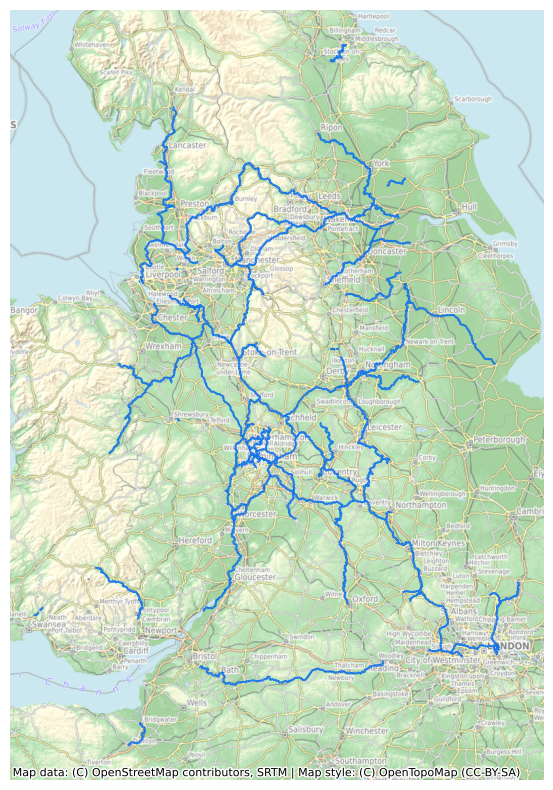

In [ ]:
import geopandas
import contextily as cx

df_wm = df_places.to_crs(epsg=3857)
ax = df_wm.plot(figsize=(10, 10), alpha=1, edgecolor="#1174E9")
ax.set_axis_off()
cx.add_basemap(ax, source=cx.providers.OpenTopoMap, alpha=0.5)

# Day 3. Polygons

Got data from OSM and plot it with Voronoi diagram (nearest subway station to every point inside cell)



In [ ]:
!pip install osmnx

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

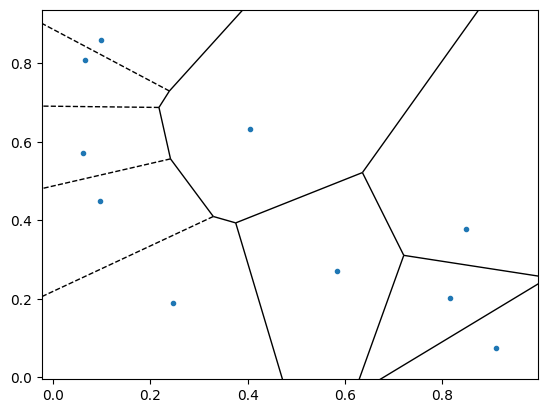

In [ ]:
rng = np.random.default_rng()
points = rng.random((10,2))
vor = Voronoi(points)
fig = voronoi_plot_2d(vor, show_vertices=False)
plt.show()

In [ ]:
from pyproj import CRS

place = 'Tokyo, Japan'

area = ox.geocode_to_gdf(place)
buildings = ox.features_from_place(place, {'station': ['subway']})

# projection = CRS.from_epsg(3067)

# buildings = buildings.to_crs(projection)
# area = area.to_crs(projection)

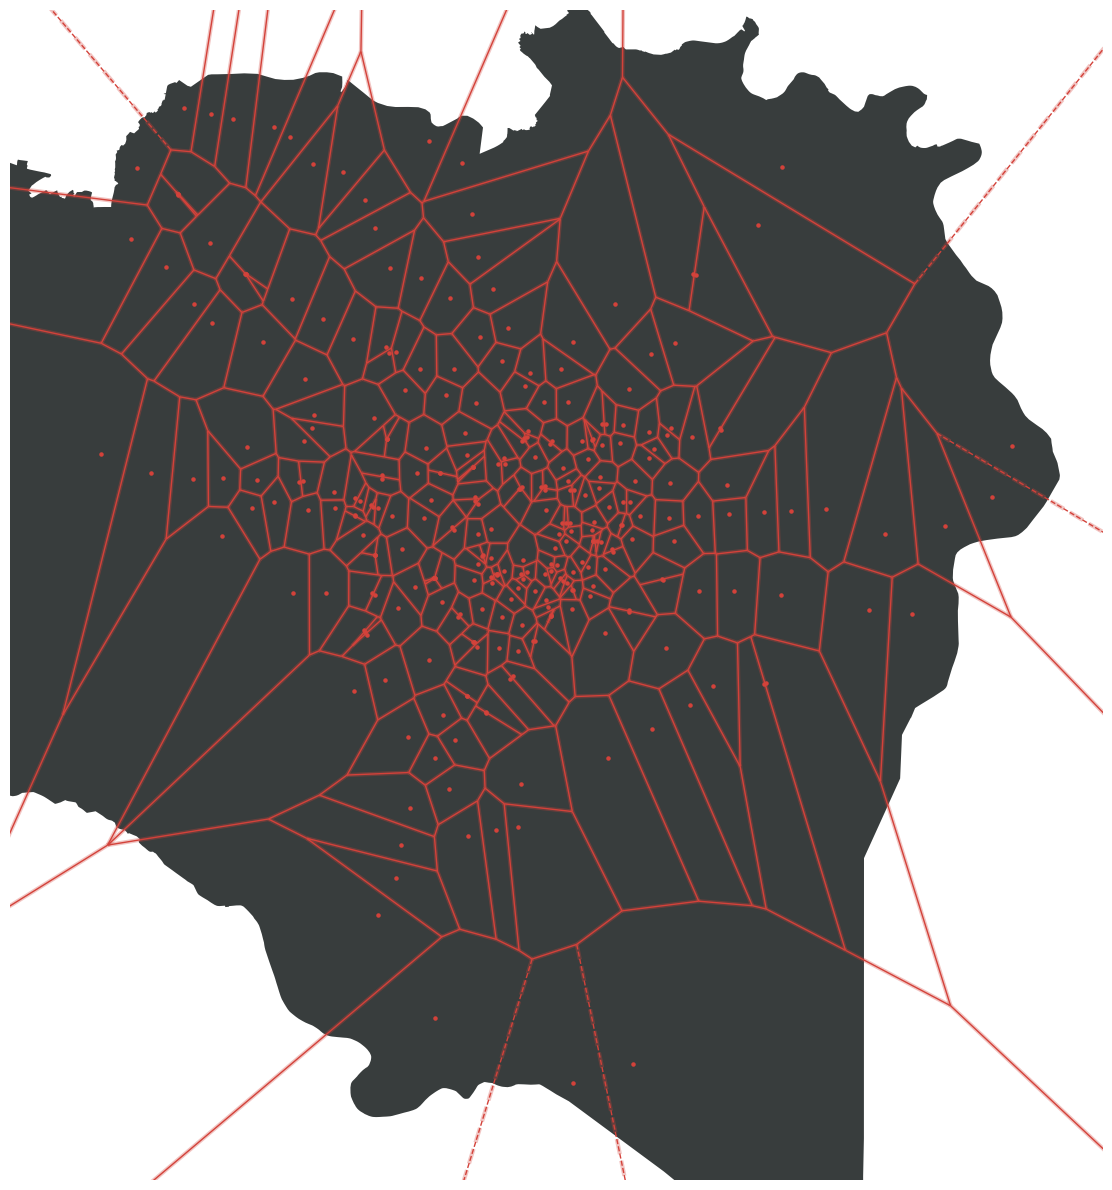

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
# fig, ax = ox.plot_footprints(buildings, figsize=(12,8), color='orange', bgcolor='white')
# fig, ax = ox.plot(buildings, figsize=(12,8), color='orange', bgcolor='white')
fig, ax = plt.subplots(figsize=(18,12))

bgcolor = '#383D3D'
color = '#D3423A'

area.plot(ax=ax, facecolor=bgcolor)
buildings.plot(ax=ax, facecolor=color, alpha=1, markersize=5)

points = [(x,y) for x,y in zip(buildings['geometry'].x , buildings['geometry'].y)]
vor = Voronoi(points)
voronoi_plot_2d(vor, show_vertices=False, show_points=False, ax=ax, line_colors=color, line_width=3, line_alpha=0.3)
voronoi_plot_2d(vor, show_vertices=False, show_points=False, ax=ax, line_colors=color, line_width=1)

plt.axis('off')
plt.tight_layout()

In [ ]:
fig.savefig("Metro.svg")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Day 24. Black & White

In [ ]:
!pip install osmnx

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# Specify the name that is used to seach for the data
place_name_example = "Kamppi, Helsinki, Finland"

# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name_example)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


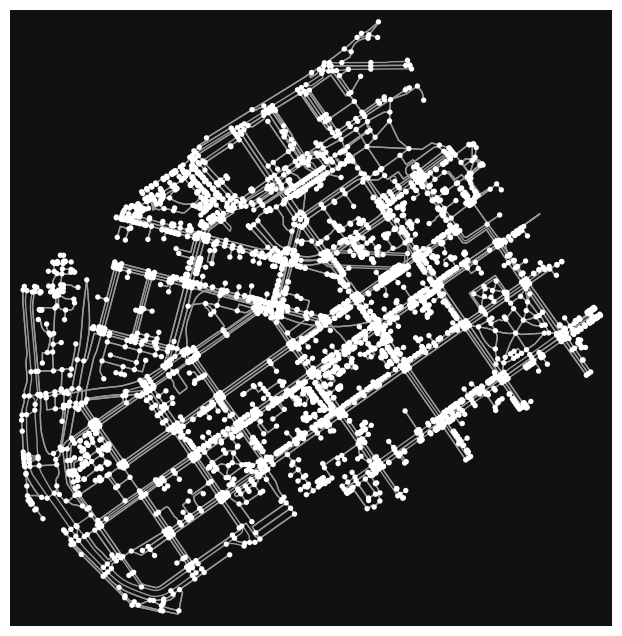

In [ ]:
fig, ax = ox.plot_graph(graph)

In [ ]:
area = ox.geocode_to_gdf(place_name_example)
buildings = ox.features_from_place(place_name_example, {'building': True})
restaurants = ox.features_from_place(place_name_example, {'amenity': ['restaurant']})
nodes, edges = ox.graph_to_gdfs(graph)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from pyproj import CRS

# Set projection
projection = CRS.from_epsg(3067)

# Re-project layers
area = area.to_crs(projection)
edges = edges.to_crs(projection)
buildings = buildings.to_crs(projection)
restaurants = restaurants.to_crs(projection)

NameError: ignored

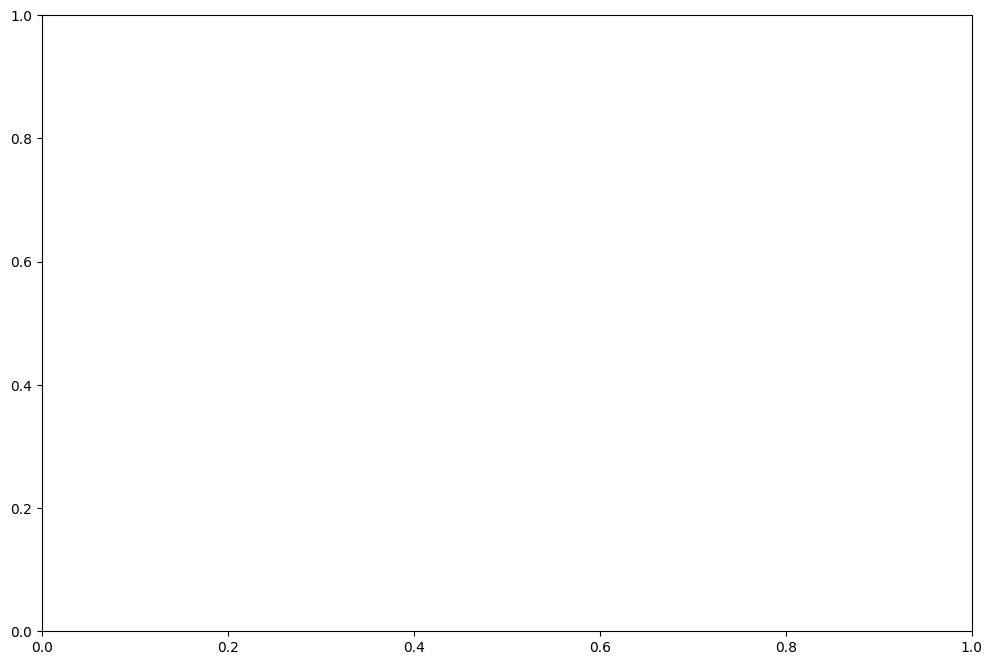

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.axis('off')
plt.tight_layout()

In [ ]:
place_name = 'Tsentralny District, Sankt Petersburg, Russia'

# area = ox.geocode_to_gdf(place_name)
buildings = ox.features_from_place(place_name, {'building': True})
# restaurants = ox.features_from_place(place_name, {'amenity': ['restaurant']})
# nodes, edges = ox.graph_to_gdfs(graph)

In [ ]:
from pyproj import CRS

# Set projection
projection = CRS.from_epsg(3067)

buildings = buildings.to_crs(projection)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

buildings.plot(ax=ax, facecolor='black', alpha=1)

plt.axis('off')
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-15-77b75b6c5e58>:3: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  gdf = ox.geometries_from_place(place_name, tags={'building':True})


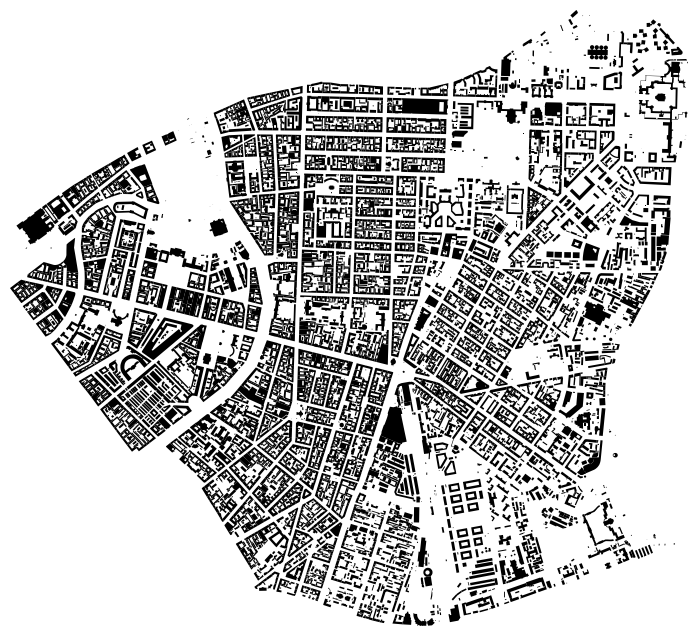

In [ ]:
import osmnx as ox

gdf = ox.geometries_from_place(place_name, tags={'building':True})
fig, ax = ox.plot_footprints(gdf, figsize=(12,8), color='black', bgcolor='white')